In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [20]:
df21=pd.read_csv('/Users/kaushikshukla/Documents/Global Freedom index/hfi_cc_2021.csv')

In [21]:
df21.head()

year  countries  ISO                         region  hf_score  hf_rank  \
0  2019    Albania  ALB                 Eastern Europe      8.14     43.0   
1  2019    Algeria  DZA     Middle East & North Africa      5.26    154.0   
2  2019     Angola  AGO             Sub-Saharan Africa      6.09    129.0   
3  2019  Argentina  ARG  Latin America & the Caribbean      7.38     74.0   
4  2019    Armenia  ARM        Caucasus & Central Asia      8.20     40.0   

   hf_quartile  pf_rol_procedural  pf_rol_civil  pf_rol_criminal  ...  \
0          2.0               5.97          4.76             4.26  ...   
1          4.0               5.21          5.64             4.35  ...   
2          4.0               2.72          4.43             3.60  ...   
3          2.0               6.83          5.94             4.35  ...   
4          1.0                NaN           NaN              NaN  ...   

   ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
0                        5.65                                6.67   
1                        4.22                                2.22   
2                        2.94                                2.44   
3                        2.71                                5.78   
4                        5.17                                5.56   

   ef_regulation_business_start  ef_regulation_business_bribes  \
0                          9.74                           6.24   
1                          9.31                           2.58   
2                          8.73                           4.70   
3                          9.58                           6.53   
4                          9.86                           6.96   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                              5.62                               7.18   
1                              8.77                               7.03   
2                              7.92                               6.78   
3                              5.73                               6.51   
4                              9.30                               7.04   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  
0                    6.85           7.70      7.81     31.0  
1                    5.69           5.84      4.90    162.0  
2                    5.59           5.97      5.50    153.0  
3                    6.14           5.99      5.50    153.0  
4                    7.32           7.82      8.03     15.0  

[5 rows x 125 columns]

In [22]:
#We need to drop the unnamed column 
#df21.drop(columns=df21.columns[0],axis=1,inplace=True)
df21.head()

year  countries  ISO                         region  hf_score  hf_rank  \
0  2019    Albania  ALB                 Eastern Europe      8.14     43.0   
1  2019    Algeria  DZA     Middle East & North Africa      5.26    154.0   
2  2019     Angola  AGO             Sub-Saharan Africa      6.09    129.0   
3  2019  Argentina  ARG  Latin America & the Caribbean      7.38     74.0   
4  2019    Armenia  ARM        Caucasus & Central Asia      8.20     40.0   

   hf_quartile  pf_rol_procedural  pf_rol_civil  pf_rol_criminal  ...  \
0          2.0               5.97          4.76             4.26  ...   
1          4.0               5.21          5.64             4.35  ...   
2          4.0               2.72          4.43             3.60  ...   
3          2.0               6.83          5.94             4.35  ...   
4          1.0                NaN           NaN              NaN  ...   

   ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
0                        5.65                                6.67   
1                        4.22                                2.22   
2                        2.94                                2.44   
3                        2.71                                5.78   
4                        5.17                                5.56   

   ef_regulation_business_start  ef_regulation_business_bribes  \
0                          9.74                           6.24   
1                          9.31                           2.58   
2                          8.73                           4.70   
3                          9.58                           6.53   
4                          9.86                           6.96   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                              5.62                               7.18   
1                              8.77                               7.03   
2                              7.92                               6.78   
3                              5.73                               6.51   
4                              9.30                               7.04   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  
0                    6.85           7.70      7.81     31.0  
1                    5.69           5.84      4.90    162.0  
2                    5.59           5.97      5.50    153.0  
3                    6.14           5.99      5.50    153.0  
4                    7.32           7.82      8.03     15.0  

[5 rows x 125 columns]

In [7]:
#We will drop the year column as a preparation for creating the training data, we may have multiple entries for a country 
#but the more data we have the better performing model
#df21.drop(columns=df21.columns[1],axis=1,inplace=True)
df21.head()

countries                         region  hf_score  hf_rank  hf_quartile  \
0    Albania                 Eastern Europe      8.14     43.0          2.0   
1    Algeria     Middle East & North Africa      5.26    154.0          4.0   
2     Angola             Sub-Saharan Africa      6.09    129.0          4.0   
3  Argentina  Latin America & the Caribbean      7.38     74.0          2.0   
4    Armenia        Caucasus & Central Asia      8.20     40.0          1.0   

   pf_rol_procedural  pf_rol_civil  pf_rol_criminal  pf_rol  pf_ss_homicide  \
0               5.97          4.76             4.26    5.00            9.33   
1               5.21          5.64             4.35    5.07            9.60   
2               2.72          4.43             3.60    3.58            8.59   
3               6.83          5.94             4.35    5.71            8.46   
4                NaN           NaN              NaN    4.98            9.51   

   ...  ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
0  ...                        5.65                                6.67   
1  ...                        4.22                                2.22   
2  ...                        2.94                                2.44   
3  ...                        2.71                                5.78   
4  ...                        5.17                                5.56   

   ef_regulation_business_start  ef_regulation_business_bribes  \
0                          9.74                           6.24   
1                          9.31                           2.58   
2                          8.73                           4.70   
3                          9.58                           6.53   
4                          9.86                           6.96   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                              5.62                               7.18   
1                              8.77                               7.03   
2                              7.92                               6.78   
3                              5.73                               6.51   
4                              9.30                               7.04   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  
0                    6.85           7.70      7.81     31.0  
1                    5.69           5.84      4.90    162.0  
2                    5.59           5.97      5.50    153.0  
3                    6.14           5.99      5.50    153.0  
4                    7.32           7.82      8.03     15.0  

[5 rows x 123 columns]

In [23]:
#df21.drop(columns=df21.columns[1],axis=1,inplace=True)
df21.head()

year  countries  ISO                         region  hf_score  hf_rank  \
0  2019    Albania  ALB                 Eastern Europe      8.14     43.0   
1  2019    Algeria  DZA     Middle East & North Africa      5.26    154.0   
2  2019     Angola  AGO             Sub-Saharan Africa      6.09    129.0   
3  2019  Argentina  ARG  Latin America & the Caribbean      7.38     74.0   
4  2019    Armenia  ARM        Caucasus & Central Asia      8.20     40.0   

   hf_quartile  pf_rol_procedural  pf_rol_civil  pf_rol_criminal  ...  \
0          2.0               5.97          4.76             4.26  ...   
1          4.0               5.21          5.64             4.35  ...   
2          4.0               2.72          4.43             3.60  ...   
3          2.0               6.83          5.94             4.35  ...   
4          1.0                NaN           NaN              NaN  ...   

   ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
0                        5.65                                6.67   
1                        4.22                                2.22   
2                        2.94                                2.44   
3                        2.71                                5.78   
4                        5.17                                5.56   

   ef_regulation_business_start  ef_regulation_business_bribes  \
0                          9.74                           6.24   
1                          9.31                           2.58   
2                          8.73                           4.70   
3                          9.58                           6.53   
4                          9.86                           6.96   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                              5.62                               7.18   
1                              8.77                               7.03   
2                              7.92                               6.78   
3                              5.73                               6.51   
4                              9.30                               7.04   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  
0                    6.85           7.70      7.81     31.0  
1                    5.69           5.84      4.90    162.0  
2                    5.59           5.97      5.50    153.0  
3                    6.14           5.99      5.50    153.0  
4                    7.32           7.82      8.03     15.0  

[5 rows x 125 columns]

In [24]:
df21.dtypes

year                                   int64
countries                             object
ISO                                   object
region                                object
hf_score                             float64
                                      ...   
ef_regulation_business_compliance    float64
ef_regulation_business               float64
ef_regulation                        float64
ef_score                             float64
ef_rank                              float64
Length: 125, dtype: object

In [25]:
df21.describe()

year     hf_score      hf_rank  hf_quartile  pf_rol_procedural  \
count  1980.000000  1867.000000  1867.000000  1867.000000        1249.000000   
mean   2013.500000     7.190787    78.330477     2.510445           5.512842   
std       3.452925     1.176588    45.249298     1.119482           2.032690   
min    2008.000000     3.490000     1.000000     1.000000           1.000000   
25%    2010.750000     6.360000    39.000000     2.000000           4.030000   
50%    2013.500000     7.240000    78.000000     3.000000           5.130000   
75%    2016.250000     8.195000   117.000000     4.000000           7.270000   
max    2019.000000     9.150000   165.000000     4.000000           9.670000   

       pf_rol_civil  pf_rol_criminal       pf_rol  pf_ss_homicide  \
count   1249.000000      1249.000000  1980.000000     1976.000000   
mean       5.532914         4.988943     5.130424        8.008148   
std        1.330313         1.629103     1.603769        2.474640   
min        1.890000         1.290000     1.110000        0.000000   
25%        4.550000         3.720000     3.930000        7.460000   
50%        5.340000         4.550000     4.790000        8.985000   
75%        6.360000         6.160000     6.360000        9.600000   
max        8.770000         8.720000     8.830000        9.950000   

       pf_ss_disappearances_disap  ...  ef_regulation_business_adm  \
count                 1957.000000  ...                 1732.000000   
mean                     8.469596  ...                    4.017979   
std                      3.049644  ...                    1.181790   
min                      0.000000  ...                    0.000000   
25%                     10.000000  ...                    3.220000   
50%                     10.000000  ...                    3.985000   
75%                     10.000000  ...                    4.710000   
max                     10.000000  ...                    7.690000   

       ef_regulation_business_bureaucracy  ef_regulation_business_start  \
count                         1845.000000                   1857.000000   
mean                             5.293886                      8.941174   
std                              2.562779                      1.136564   
min                              0.000000                      0.780000   
25%                              3.330000                      8.660000   
50%                              5.330000                      9.340000   
75%                              7.330000                      9.660000   
max                             10.000000                      9.980000   

       ef_regulation_business_bribes  ef_regulation_business_licensing  \
count                    1911.000000                       1836.000000   
mean                        5.765144                          7.870626   
std                         2.401161                          1.623539   
min                         0.000000                          0.000000   
25%                         3.790000                          7.150000   
50%                         5.710000                          8.240000   
75%                         7.660000                          9.070000   
max                        10.000000                         10.000000   

       ef_regulation_business_compliance  ef_regulation_business  \
count                        1853.000000             1863.000000   
mean                            6.935769                6.509152   
std                             2.028033                1.270069   
min                             0.000000                1.980000   
25%                             6.330000                5.710000   
50%                             7.430000                6.580000   
75%                             8.240000                7.360000   
max                             9.930000                9.450000   

       ef_regulation     ef_score      ef_rank  
count    1880.000000  1867.000000  

In [26]:
#Missing and null values treatment
#check for null values
df21.isnull().sum()

year                                   0
countries                              0
ISO                                    0
region                                 0
hf_score                             113
                                    ... 
ef_regulation_business_compliance    127
ef_regulation_business               117
ef_regulation                        100
ef_score                             113
ef_rank                              113
Length: 125, dtype: int64

In [27]:
#fill the null values with mean of the column
nan_columns = df21.isnull().any()
columns_with_nan=df21.columns[nan_columns].tolist()
print(columns_with_nan)

for column in columns_with_nan:
    df21[column].fillna(df21.groupby('countries')[column].transform('mean'),inplace=True)

['hf_score', 'hf_rank', 'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_ss_homicide', 'pf_ss_disappearances_disap', 'pf_ss_disappearances_organized', 'pf_ss_disappearances_torture', 'pf_ss_killings', 'pf_movement_vdem_foreign', 'pf_movement_vdem_men', 'pf_movement_vdem_women', 'pf_movement_vdem', 'pf_movement_cld', 'pf_religion_suppression', 'pf_religion_freedom_vdem', 'pf_religion_freedom_cld', 'pf_assembly_entry', 'pf_assembly_freedom_bti', 'pf_assembly_freedom_cld', 'pf_assembly_parties_barriers', 'pf_assembly_parties_bans', 'pf_assembly_parties_auton', 'pf_assembly_parties', 'pf_assembly_civil', 'pf_expression_cultural', 'pf_expression_gov', 'pf_expression_internet', 'pf_expression_harass', 'pf_expression_selfcens', 'pf_expression_freedom_bti', 'pf_expression_freedom_cld', 'pf_expression_freedom', 'pf_identity_same_m', 'pf_identity_same_f', 'pf_identity_same', 'pf_identity_divorce', 'pf_identity_fgm', 'pf_identity_inheritance_widows', 'pf_identity_inherit

In [28]:
#Check for nulls after the above process
df21.isnull().sum()

year                                  0
countries                             0
ISO                                   0
region                                0
hf_score                              0
                                     ..
ef_regulation_business_compliance    12
ef_regulation_business                0
ef_regulation                         0
ef_score                              0
ef_rank                               0
Length: 125, dtype: int64

In [29]:
# Some countries have no values at all, for certain columns
df21[columns_with_nan].isnull().any()

hf_score                             False
hf_rank                              False
hf_quartile                          False
pf_rol_procedural                     True
pf_rol_civil                          True
                                     ...  
ef_regulation_business_compliance     True
ef_regulation_business               False
ef_regulation                        False
ef_score                             False
ef_rank                              False
Length: 102, dtype: bool

In [30]:
#Fill missing values with mean
for column in columns_with_nan:
    mean_value=df21[column].mean()
    df21[column].fillna(value=mean_value, inplace=True)

In [31]:
df21[columns_with_nan].isnull().any()

hf_score                             False
hf_rank                              False
hf_quartile                          False
pf_rol_procedural                    False
pf_rol_civil                         False
                                     ...  
ef_regulation_business_compliance    False
ef_regulation_business               False
ef_regulation                        False
ef_score                             False
ef_rank                              False
Length: 102, dtype: bool

In [32]:
# Obtain Categorical column names
categorical_columns=[i for i in df21.columns if df21.dtypes[i]=='object']
print(categorical_columns)

['countries', 'ISO', 'region']


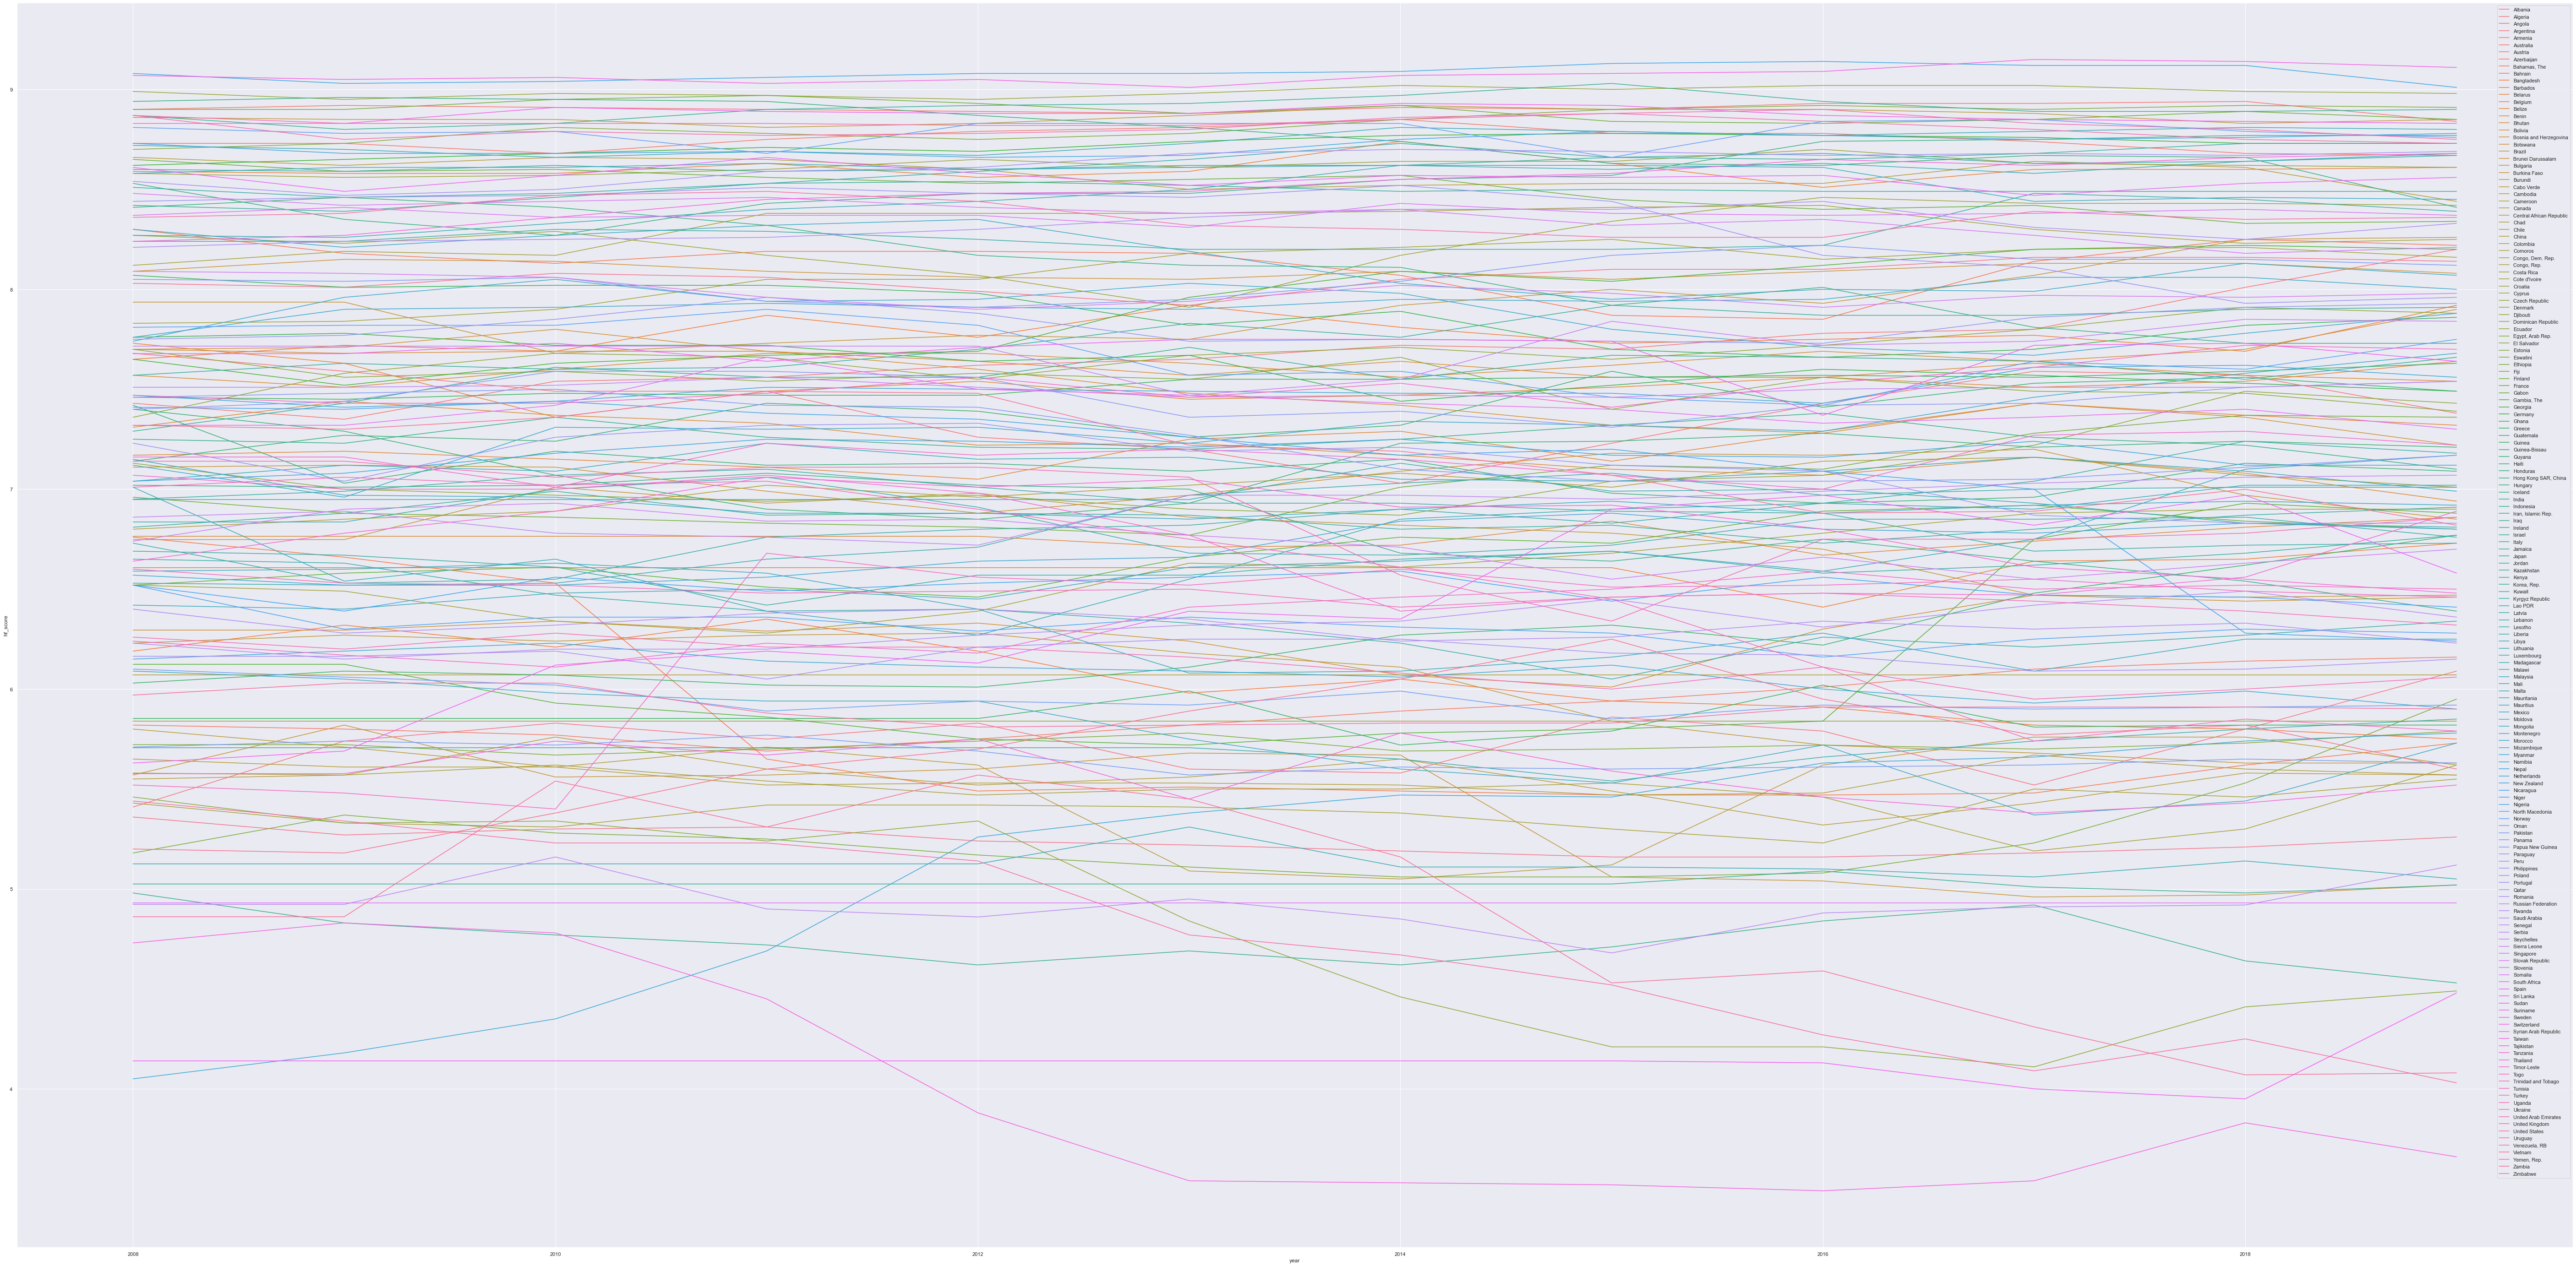

In [33]:
#Exploratory Data analysis of the data
# Set plot size
sns.set(rc={'figure.figsize':(100,50)})
sns.lineplot(data=df21, x="year", y="hf_score",hue="countries")
plt.legend(fontsize=30)
plt.legend(fontsize="xx-large")
plt.legend(loc='upper right')

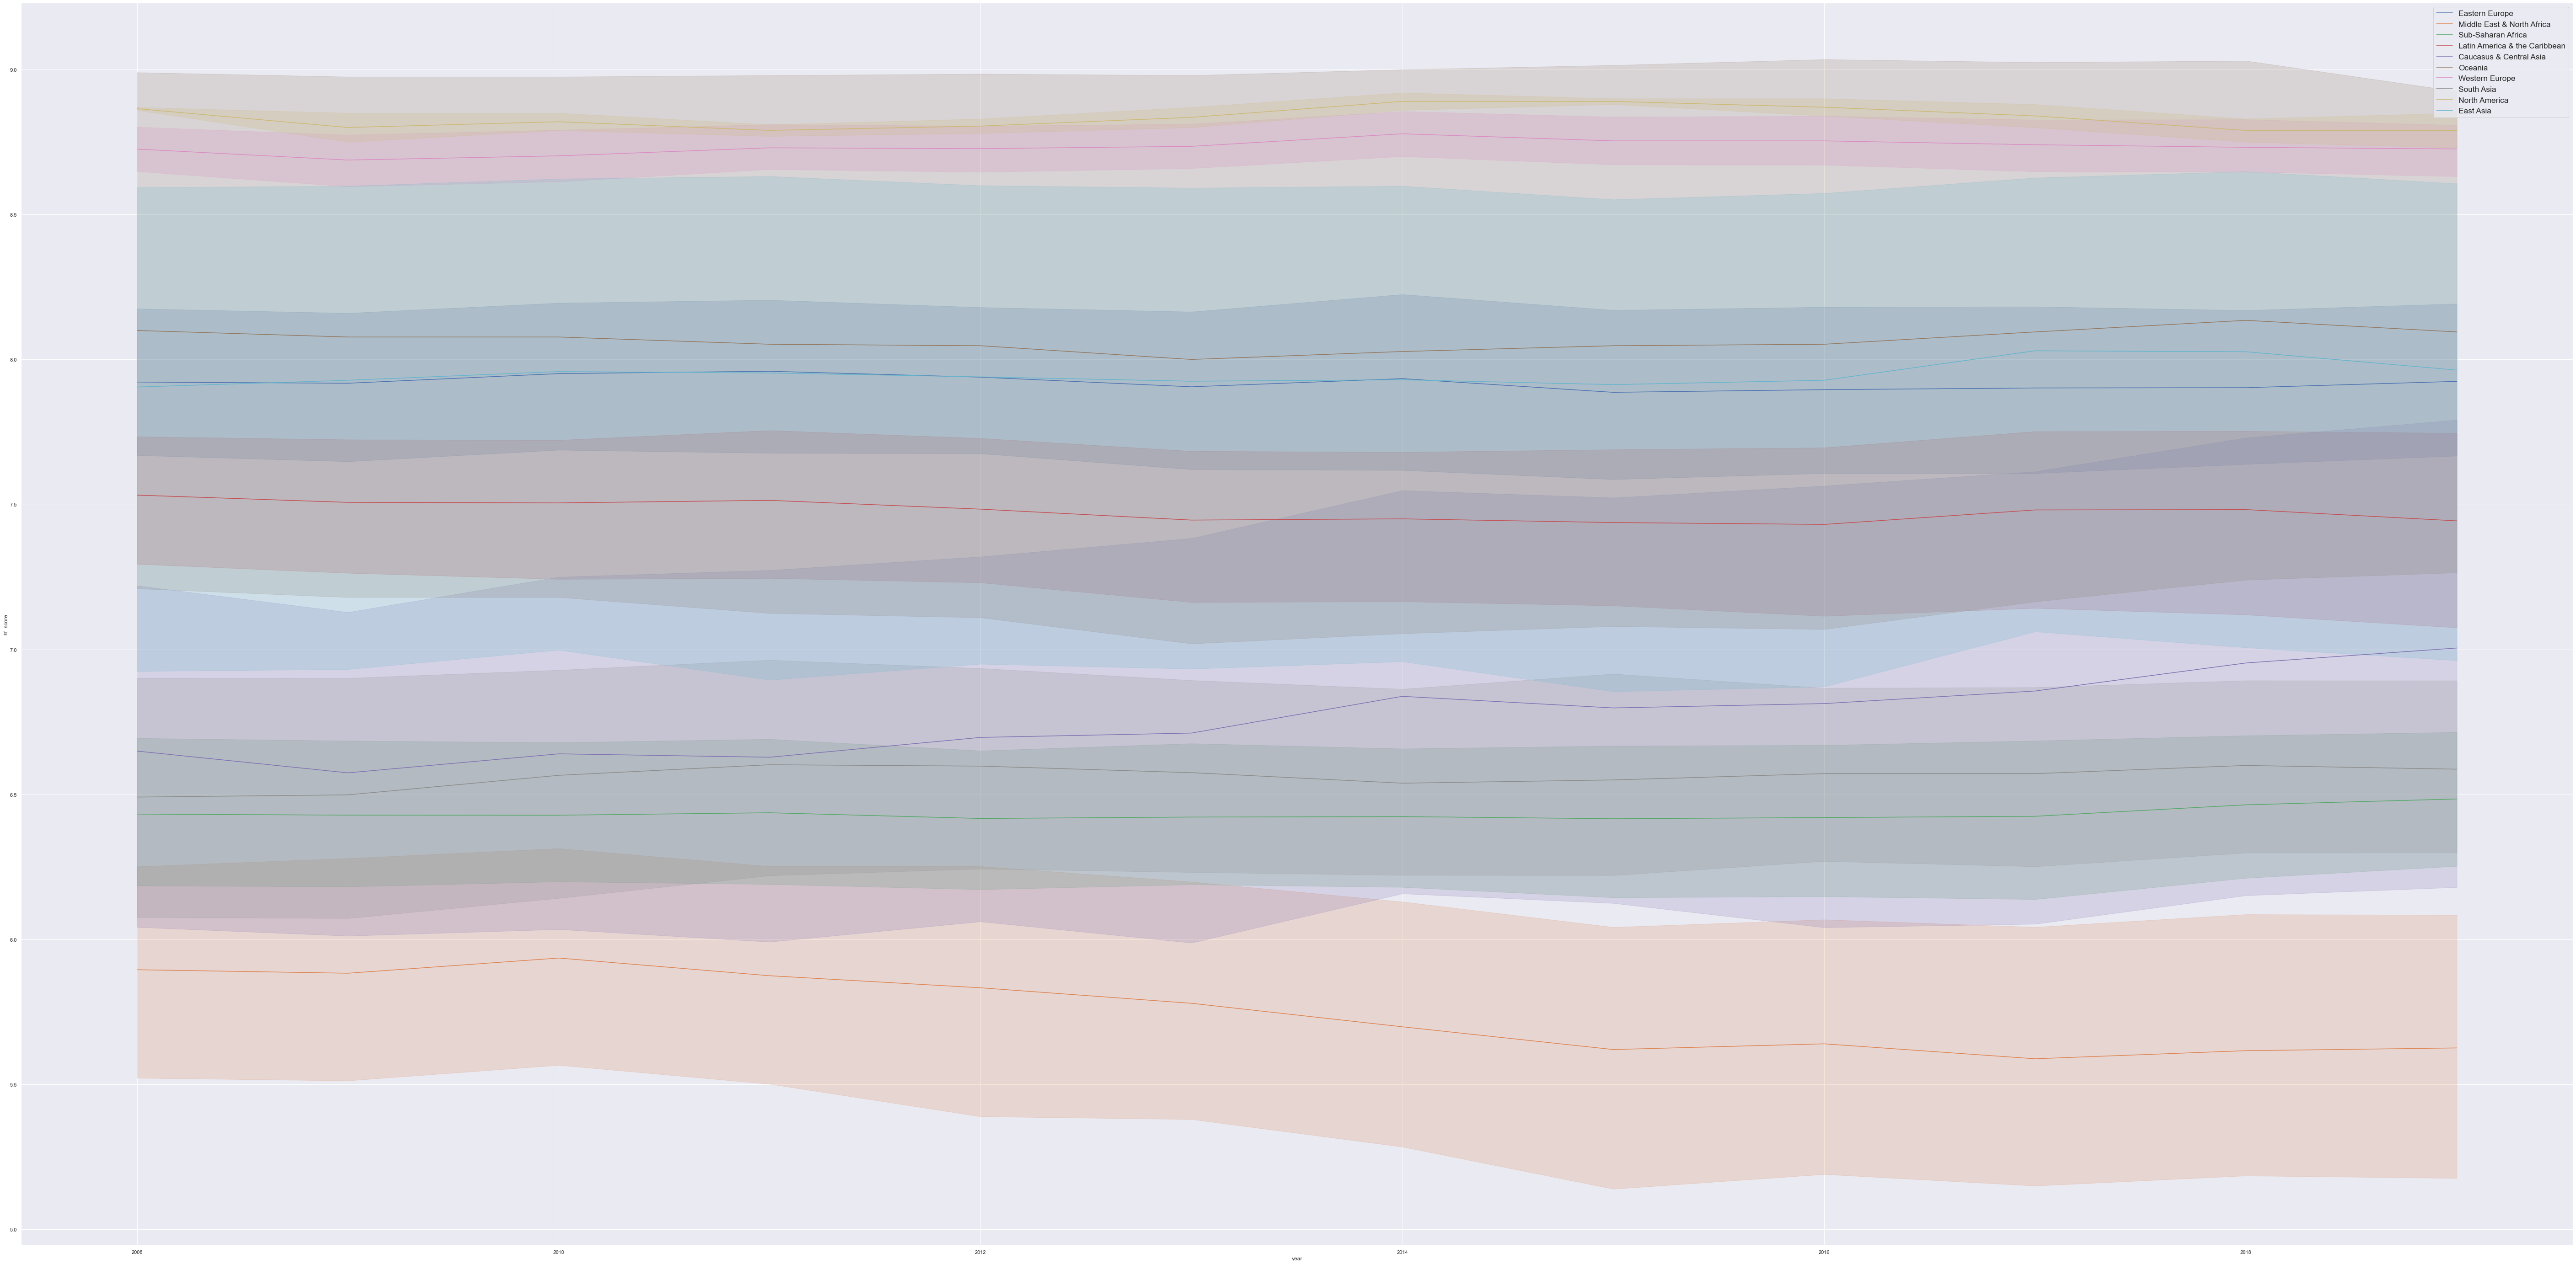

In [35]:
sns.lineplot(data=df21, x="year", y="hf_score",hue="region")
plt.legend(fontsize=25)
plt.legend(fontsize="x-large")

In [44]:
#View counties based on the rank 

dfrank = df21[['hf_rank','countries','hf_score']].sort_values(by = 'hf_rank')
dfrank.countries.drop_duplicates()


308              Switzerland
604              New Zealand
1527                 Denmark
1716    Hong Kong SAR, China
733                  Ireland
                ...         
1079                   Libya
1448            Saudi Arabia
567                     Iraq
1951                 Somalia
470                    Sudan
Name: countries, Length: 165, dtype: object

In [162]:
#the variables with prefix pf are the variables significant for personal freedom and the ones with ef 
#are signifcant for economic freedom. So it may be a good idea to split the analysis into two parts economic 
#freedom as one part and personal freedom as one part the average of these two scores gives us the human 
#We will split the dependent variables into two groups one for economic freedom and one for personal freedom.

efdf = df21.filter(regex='^ef',axis=1)
pfdf = df21.filter(regex='^pf',axis=1)


In [84]:
efdf.head()


ef_government_consumption  ef_government_transfers  \
0                        8.2                      6.7   
1                        8.1                      6.7   
2                        8.2                      6.7   
3                        8.2                      7.0   
4                        8.1                      6.9   

   ef_government_enterprises  ef_government_tax_income  \
0                        8.0                       9.0   
1                        8.0                       9.0   
2                        8.4                       9.0   
3                        8.1                       9.0   
4                        7.6                       9.0   

   ef_government_tax_payroll  ef_government_tax  ef_government_soa  \
0                        7.0                8.0                9.5   
1                        7.0                8.0                6.2   
2                        7.0                8.0                7.8   
3                        7.0                8.0                7.8   
4                        7.0                8.0                7.8   

   ef_government  ef_legal_judicial  ef_legal_courts  ...  \
0            8.1                3.6              3.7  ...   
1            7.4                3.8              3.9  ...   
2            7.8                4.0              3.9  ...   
3            7.8                4.0              3.9  ...   
4            7.7                4.0              3.9  ...   

   ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
0                         5.7                                 6.7   
1                         6.3                                 6.7   
2                         6.1                                 6.0   
3                         6.1                                 6.0   
4                         5.9                                 6.0   

   ef_regulation_business_start  ef_regulation_business_bribes  \
0                           9.7                            5.4   
1                           9.7                            6.0   
2                           9.7                            6.0   
3                           9.7                            6.0   
4                           9.7                            6.0   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                               5.6                                7.2   
1                               6.0                                7.2   
2                               7.3                                7.1   
3                               7.3                                7.1   
4                               7.2                                6.0   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  
0                     6.7            7.7      7.80     26.0  
1                     7.0            7.9      7.70     36.0  
2                     7.0            7.6      7.69     36.0  
3                     7.0            7.7      7.70     34.0  
4                     6.8            7.8      7.65     37.0  

[5 rows x 57 columns]

In [163]:
pfdf.head()

pf_rol_procedural  pf_rol_civil  pf_rol_criminal  pf_rol  pf_ss_homicide  \
0           5.970000        4.7600         4.260000    5.00            9.33   
1           5.210000        5.6400         4.350000    5.07            9.60   
2           2.720000        4.4300         3.600000    3.58            8.59   
3           6.830000        5.9400         4.350000    5.71            8.46   
4           5.358723        5.4641         4.872015    4.98            9.51   

   pf_ss_disappearances_disap  pf_ss_disappearances_violent  \
0                        10.0                         10.00   
1                        10.0                         10.00   
2                        10.0                          9.57   
3                         5.0                         10.00   
4                        10.0                         10.00   

   pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  \
0                             7.5                            10.00   
1                             5.0                            10.00   
2                             7.5                             9.74   
3                             7.5                             9.93   
4                             7.5                            10.00   

   pf_ss_disappearances_injuries  ...  pf_identity_same  pf_identity_divorce  \
0                          10.00  ...              10.0                  7.5   
1                          10.00  ...               0.0                  0.0   
2                           9.97  ...               5.0                  5.0   
3                          10.00  ...              10.0                 10.0   
4                          10.00  ...              10.0                  7.5   

   pf_identity_fgm  pf_identity_inheritance_widows  \
0             10.0                        6.666667   
1             10.0                        1.666667   
2             10.0                        5.000000   
3             10.0                       10.000000   
4             10.0                       10.000000   

   pf_identity_inheritance_daughters  pf_identity_inheritance  pf_identity  \
0                           5.000000                      7.5         8.75   
1                           1.666667                      0.0         2.50   
2                           5.000000                      5.0         6.25   
3                          10.000000                     10.0        10.00   
4                          10.000000                      7.5         8.75   

   pf_score  pf_rank  pf_womens  
0      8.38     45.0       8.97  
1      5.51    141.0       3.78  
2      6.50    113.0       7.75  
3      8.73     34.0       9.93  
4      8.32     48.0       8.95  

[5 rows x 62 columns]

In [165]:
#Add countries column to each to the dataframes
efdf['countries'] = df21['countries']
pfdf['countries'] = df21['countries']

<ipython-input-165-b8952898d465>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  efdf['countries'] = df21['countries']
<ipython-input-165-b8952898d465>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfdf['countries'] = df21['countries']


In [166]:
efdf.head()

ef_government_consumption  ef_government_transfers  \
0                       8.16                     7.33   
1                       3.52                     7.82   
2                       7.29                     9.62   
3                       5.99                     6.49   
4                       7.94                     7.86   

   ef_government_enterprises  ef_government_tax_income  \
0                       8.00                       9.0   
1                       4.61                       7.0   
2                       6.73                      10.0   
3                       7.59                       7.0   
4                       9.30                       5.0   

   ef_government_tax_payroll  ef_government_tax  ef_government_soa  \
0                        7.0                8.0               8.54   
1                        2.0                4.5               2.63   
2                        9.0                9.5               4.49   
3                        1.0                4.0               7.24   
4                        5.0                5.0               9.07   

   ef_government  ef_legal_judicial  ef_legal_courts  ...  \
0           8.00               4.13             4.26  ...   
1           4.62               4.16             4.49  ...   
2           7.53               4.08             3.60  ...   
3           6.26               5.07             4.28  ...   
4           7.83               4.99             5.76  ...   

   ef_regulation_business_bureaucracy  ef_regulation_business_start  \
0                                6.67                          9.74   
1                                2.22                          9.31   
2                                2.44                          8.73   
3                                5.78                          9.58   
4                                5.56                          9.86   

   ef_regulation_business_bribes  ef_regulation_business_licensing  \
0                           6.24                              5.62   
1                           2.58                              8.77   
2                           4.70                              7.92   
3                           6.53                              5.73   
4                           6.96                              9.30   

   ef_regulation_business_compliance  ef_regulation_business  ef_regulation  \
0                               7.18                    6.85           7.70   
1                               7.03                    5.69           5.84   
2                               6.78                    5.59           5.97   
3                               6.51                    6.14           5.99   
4                               7.04                    7.32           7.82   

   ef_score  ef_rank  countries  
0      7.81     31.0    Albania  
1      4.90    162.0    Algeria  
2      5.50    153.0     Angola  
3      5.50    153.0  Argentina  
4      8.03     15.0    Armenia  

[5 rows x 57 columns]

In [167]:
pfdf.head()

pf_rol_procedural  pf_rol_civil  pf_rol_criminal  pf_rol  pf_ss_homicide  \
0           5.970000        4.7600         4.260000    5.00            9.33   
1           5.210000        5.6400         4.350000    5.07            9.60   
2           2.720000        4.4300         3.600000    3.58            8.59   
3           6.830000        5.9400         4.350000    5.71            8.46   
4           5.358723        5.4641         4.872015    4.98            9.51   

   pf_ss_disappearances_disap  pf_ss_disappearances_violent  \
0                        10.0                         10.00   
1                        10.0                         10.00   
2                        10.0                          9.57   
3                         5.0                         10.00   
4                        10.0                         10.00   

   pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  \
0                             7.5                            10.00   
1                             5.0                            10.00   
2                             7.5                             9.74   
3                             7.5                             9.93   
4                             7.5                            10.00   

   pf_ss_disappearances_injuries  ...  pf_identity_divorce  pf_identity_fgm  \
0                          10.00  ...                  7.5             10.0   
1                          10.00  ...                  0.0             10.0   
2                           9.97  ...                  5.0             10.0   
3                          10.00  ...                 10.0             10.0   
4                          10.00  ...                  7.5             10.0   

   pf_identity_inheritance_widows  pf_identity_inheritance_daughters  \
0                        6.666667                           5.000000   
1                        1.666667                           1.666667   
2                        5.000000                           5.000000   
3                       10.000000                          10.000000   
4                       10.000000                          10.000000   

   pf_identity_inheritance  pf_identity  pf_score  pf_rank  pf_womens  \
0                      7.5         8.75      8.38     45.0       8.97   
1                      0.0         2.50      5.51    141.0       3.78   
2                      5.0         6.25      6.50    113.0       7.75   
3                     10.0        10.00      8.73     34.0       9.93   
4                      7.5         8.75      8.32     48.0       8.95   

   countries  
0    Albania  
1    Algeria  
2     Angola  
3  Argentina  
4    Armenia  

[5 rows x 63 columns]

In [168]:
count_row = pfdf.shape[0]

In [169]:
print(count_row)

1980


In [170]:
column_names=list(efdf.columns)
column_names1=list(pfdf.columns)

In [171]:
attributes=set(column_names[4:])
not_to_check=set(['ef_rank'])
attributes=sorted(list(set(attributes) - set(not_to_check)))

<AxesSubplot:>

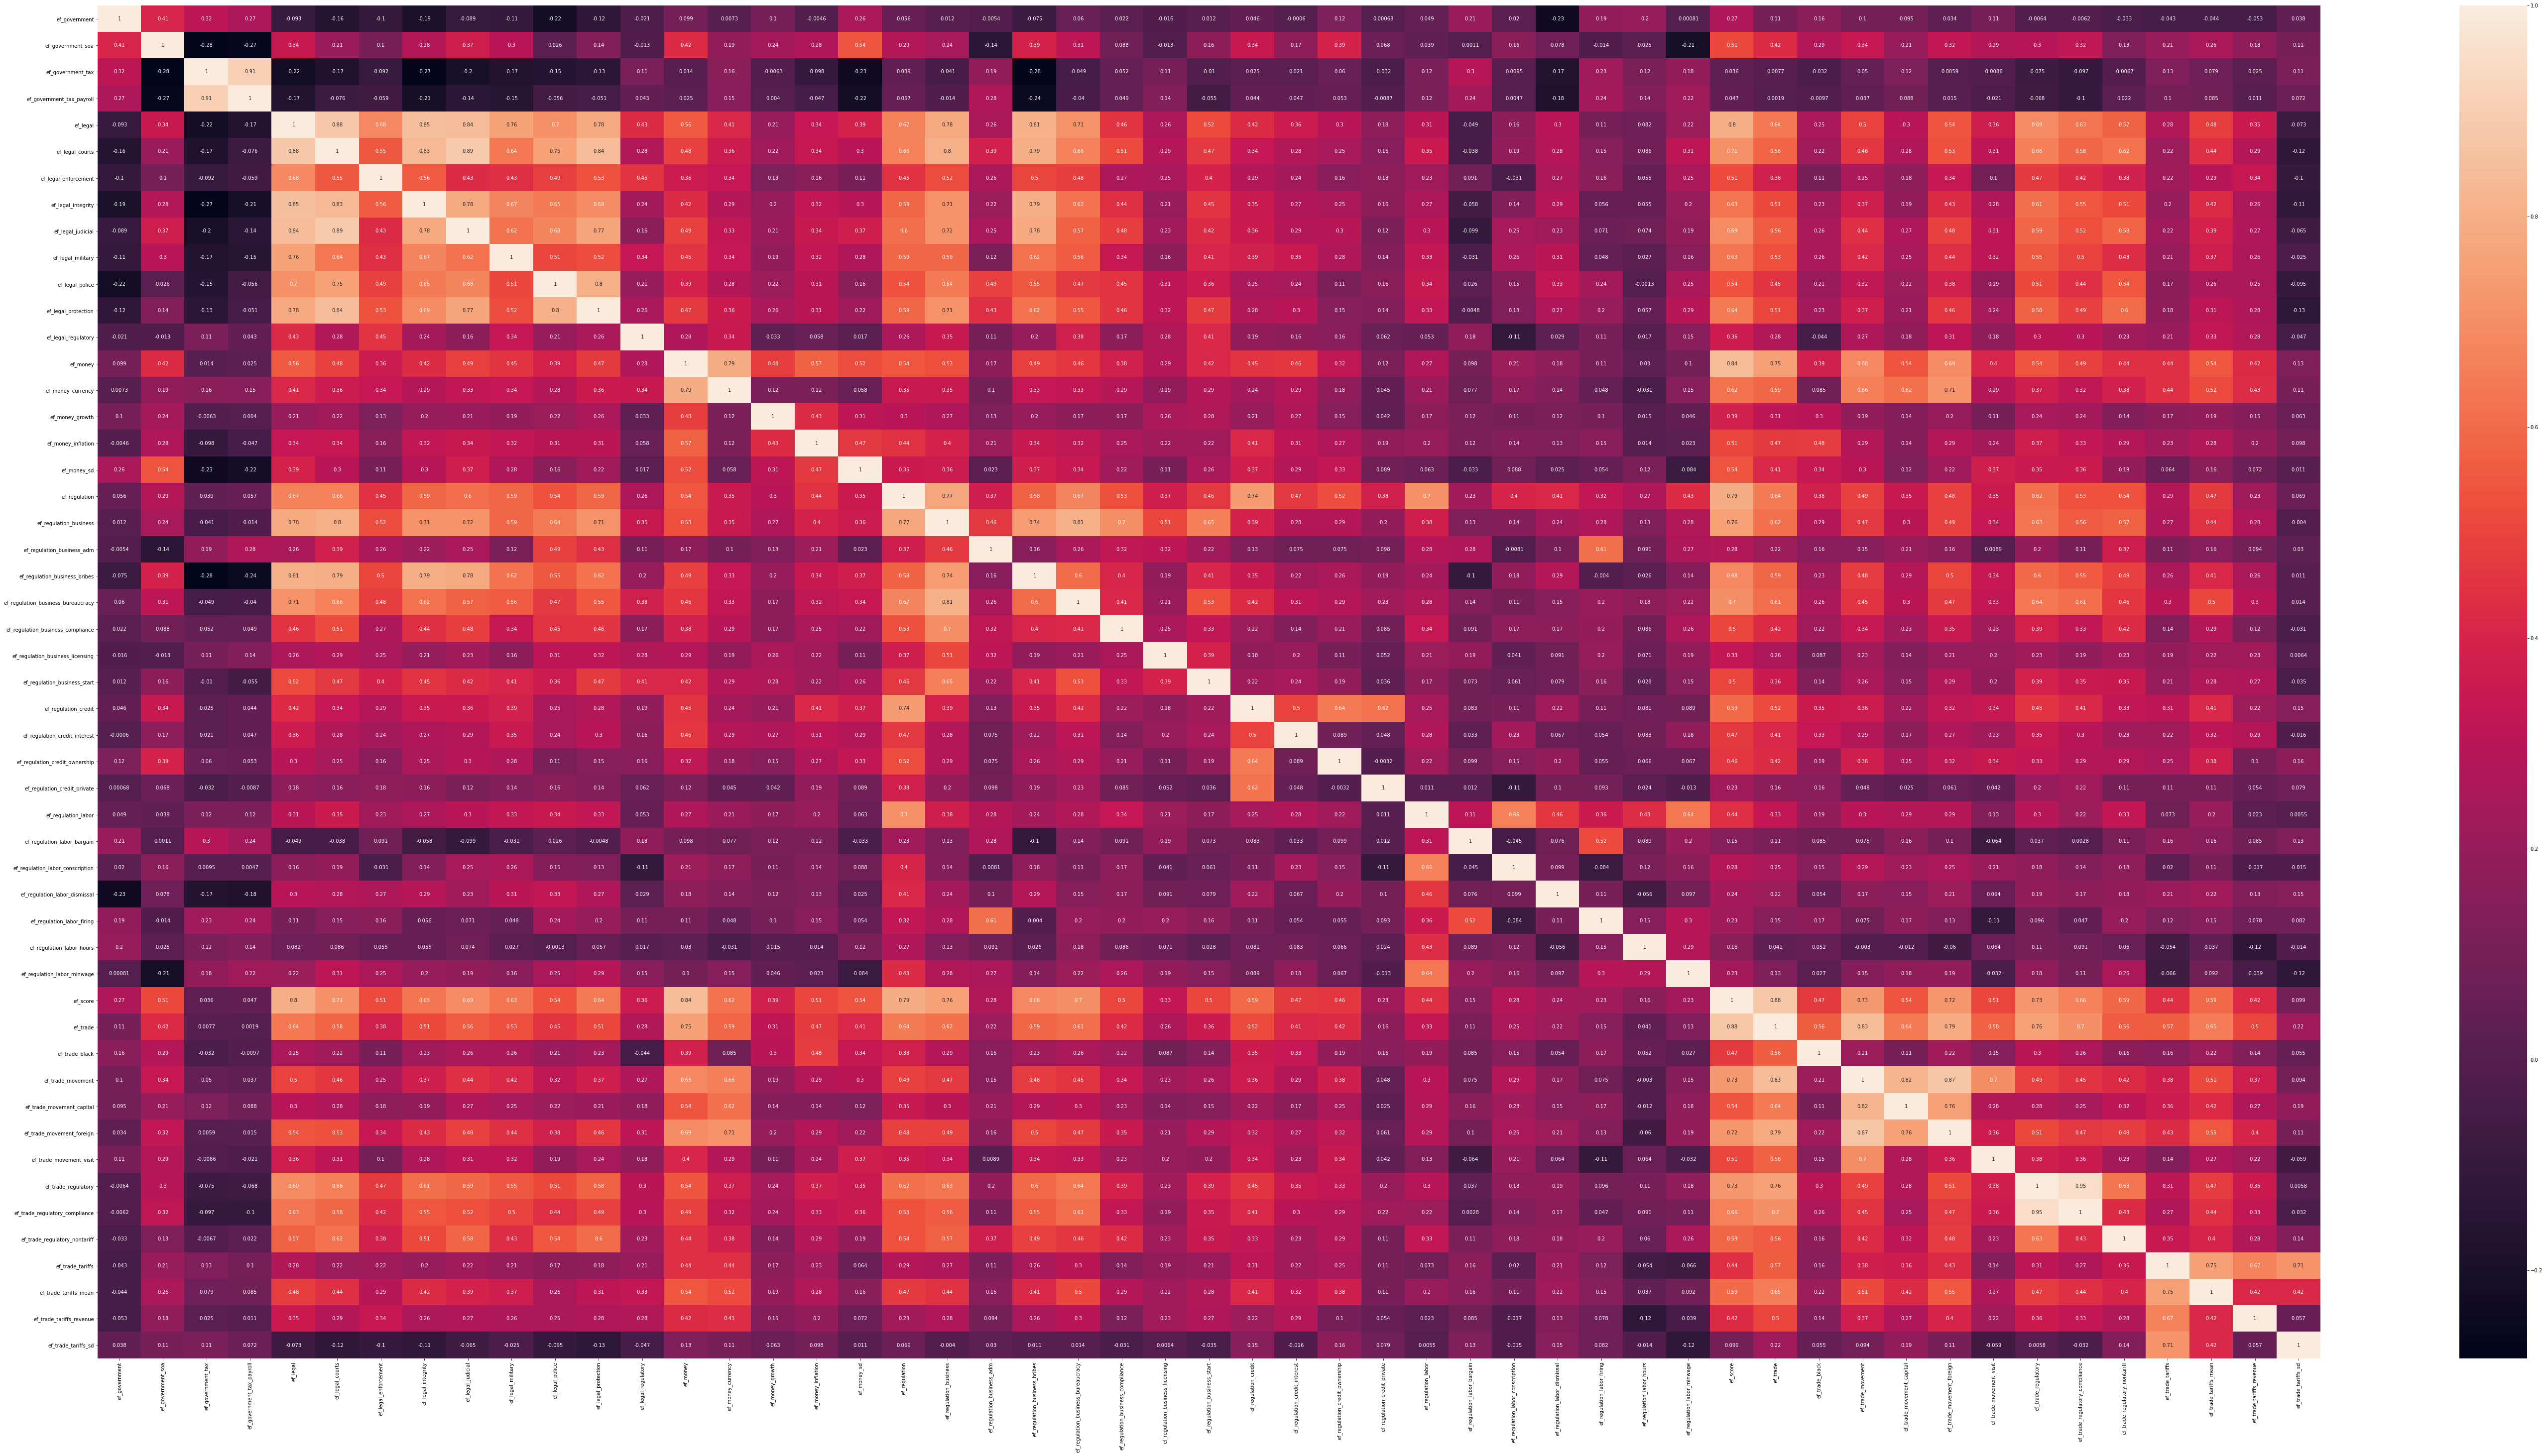

In [172]:
# Check correlation of attributes
plt.figure(figsize=(100,50))
correlation=efdf[attributes].corr()
sns.heatmap(correlation,annot=True)

In [173]:
attributes=set(column_names1[4:])
not_to_check=set(['pf_rank'])
attributes=sorted(list(set(attributes) - set(not_to_check)))

<AxesSubplot:>

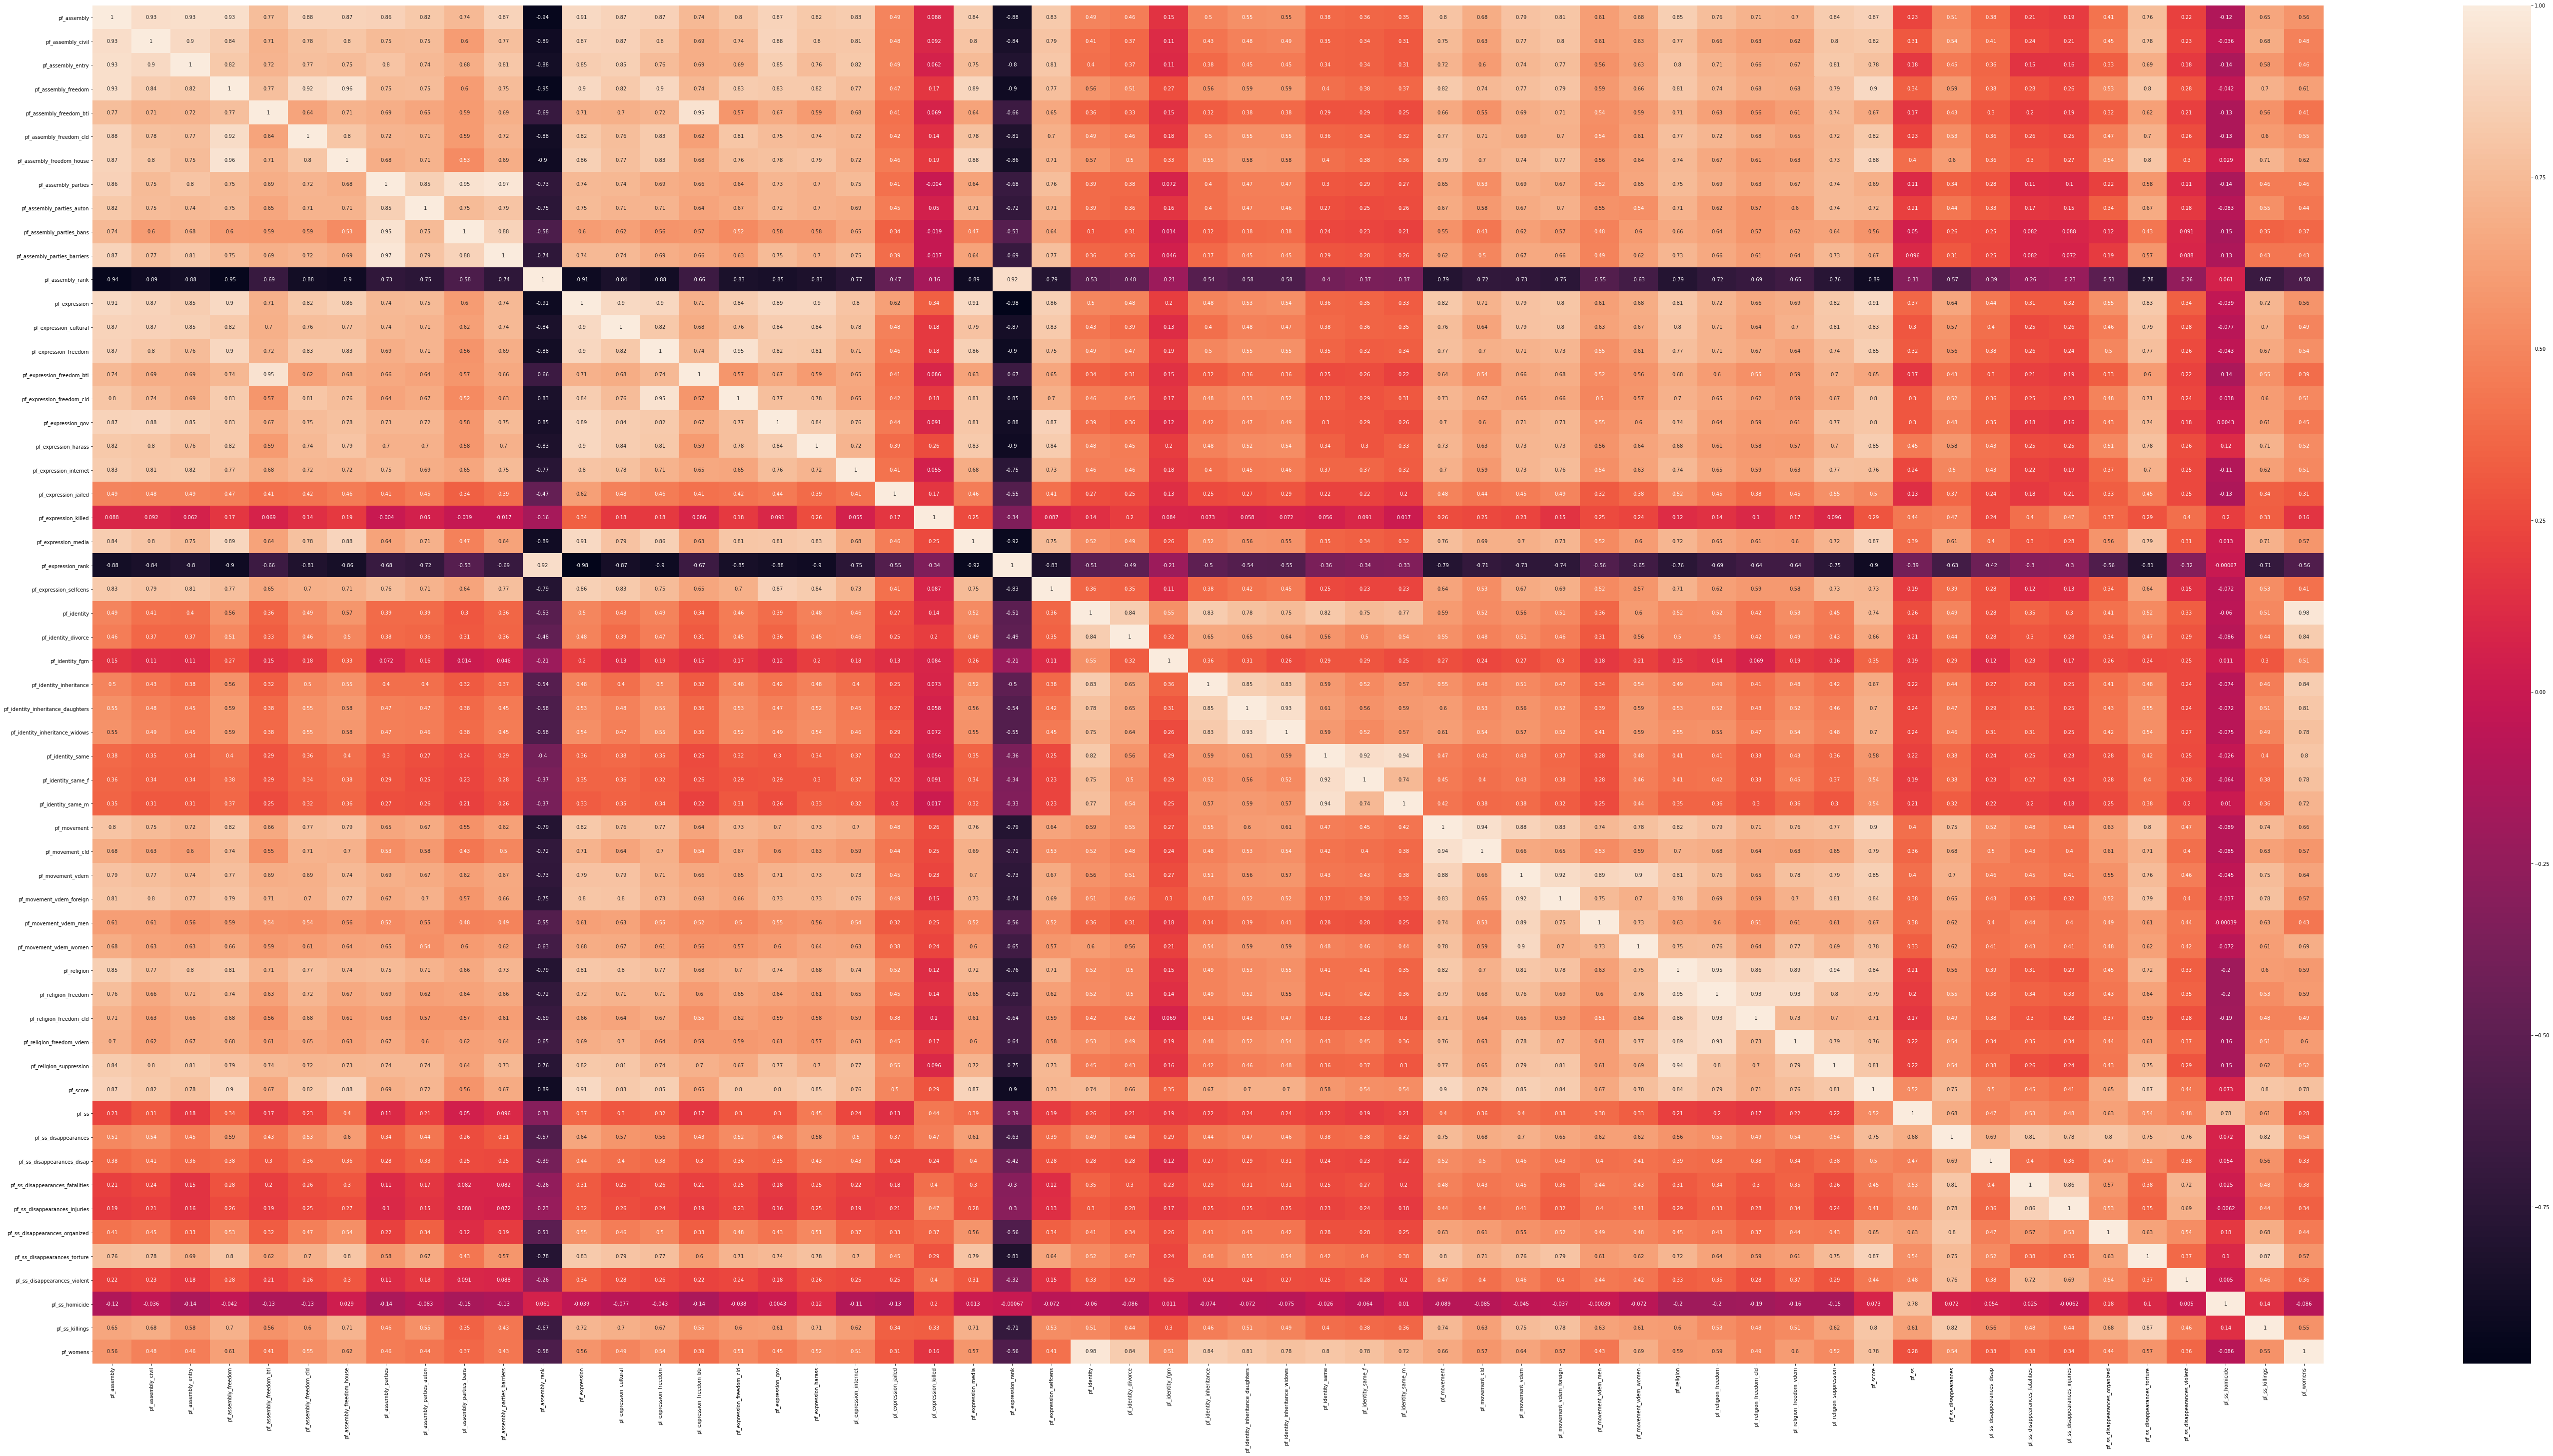

In [174]:
# Check correlation of attributes
plt.figure(figsize=(100,50))
correlation=pfdf[attributes].corr()
sns.heatmap(correlation,annot=True)

In [28]:
pip install 'factor_analyzer'

     |████████████████████████████████| 41 kB 1.2 MB/s eta 0:00:01
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41441 sha256=dad652abde9bedab2c04cef260e2abb1e75b8d0cd644b555cae9c912f555b6d5
  Stored in directory: /Users/kaushikshukla/Library/Caches/pip/wheels/00/cf/ea/83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [95]:
# Import required libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [97]:
efdf.info

<bound method DataFrame.info of       ef_government_consumption  ef_government_transfers  \
0                           8.2                      6.7   
1                           8.1                      6.7   
2                           8.2                      6.7   
3                           8.2                      7.0   
4                           8.1                      6.9   
...                         ...                      ...   
1777                        6.6                     10.0   
1778                        6.4                     10.0   
1779                        7.5                      9.8   
1780                        9.2                     10.0   
1781                       10.0                      7.7   

      ef_government_enterprises  ef_government_tax_income  \
0                           8.0                       9.0   
1                           8.0                       9.0   
2                           8.4                       9.0   
3  

In [99]:
efdf.head()

ef_government_consumption  ef_government_transfers  \
0                        8.2                      6.7   
1                        8.1                      6.7   
2                        8.2                      6.7   
3                        8.2                      7.0   
4                        8.1                      6.9   

   ef_government_enterprises  ef_government_tax_income  \
0                        8.0                       9.0   
1                        8.0                       9.0   
2                        8.4                       9.0   
3                        8.1                       9.0   
4                        7.6                       9.0   

   ef_government_tax_payroll  ef_government_tax  ef_government_soa  \
0                        7.0                8.0                9.5   
1                        7.0                8.0                6.2   
2                        7.0                8.0                7.8   
3                        7.0                8.0                7.8   
4                        7.0                8.0                7.8   

   ef_government  ef_legal_judicial  ef_legal_courts  ...  \
0            8.1                3.6              3.7  ...   
1            7.4                3.8              3.9  ...   
2            7.8                4.0              3.9  ...   
3            7.8                4.0              3.9  ...   
4            7.7                4.0              3.9  ...   

   ef_regulation_business_bureaucracy  ef_regulation_business_start  \
0                                 6.7                           9.7   
1                                 6.7                           9.7   
2                                 6.0                           9.7   
3                                 6.0                           9.7   
4                                 6.0                           9.7   

   ef_regulation_business_bribes  ef_regulation_business_licensing  \
0                            5.4                               5.6   
1                            6.0                               6.0   
2                            6.0                               7.3   
3                            6.0                               7.3   
4                            6.0                               7.2   

   ef_regulation_business_compliance  ef_regulation_business  ef_regulation  \
0                                7.2                     6.7            7.7   
1                                7.2                     7.0            7.9   
2                                7.1                     7.0            7.6   
3                                7.1                     7.0            7.7   
4                                6.0                     6.8            7.8   

   ef_score  ef_rank  countries  
0      7.80     26.0    Albania  
1      7.70     36.0    Albania  
2      7.69     36.0    Albania  
3      7.70     34.0    Albania  
4      7.65     37.0    Albania  

[5 rows x 58 columns]

In [100]:
ecodf = efdf.drop(['ef_score', 'ef_rank', 'countries'],axis=1)

In [101]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(ecodf)

In [102]:
kmo_model

0.7045504960777406

In [40]:
pfdf.head()

pf_rol_procedural  pf_rol_civil  pf_rol_criminal  pf_rol  pf_ss_homicide  \
0                6.0           4.8              4.3     5.0             9.1   
1                6.3           4.4              4.7     5.3             9.1   
2                6.7           4.5              4.7     5.3             8.6   
3                6.7           4.5              4.7     5.2             8.9   
4                6.1           4.8              4.6     5.0             8.4   

   pf_ss_disappearances_disap  pf_ss_disappearances_violent  \
0                        10.0                          10.0   
1                        10.0                          10.0   
2                        10.0                          10.0   
3                        10.0                          10.0   
4                        10.0                          10.0   

   pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  \
0                            10.0                             10.0   
1                            10.0                             10.0   
2                            10.0                             10.0   
3                            10.0                             10.0   
4                            10.0                              9.9   

   pf_ss_disappearances_injuries  ...  pf_expression  pf_identity_legal  \
0                           10.0  ...            9.2                0.0   
1                           10.0  ...            9.2                0.0   
2                           10.0  ...            9.2                0.0   
3                           10.0  ...            9.2                0.0   
4                            9.9  ...            9.2                0.0   

   pf_identity_sex_male  pf_identity_sex_female  pf_identity_sex  \
0                  10.0                    10.0             10.0   
1                  10.0                    10.0             10.0   
2                  10.0                    10.0             10.0   
3                  10.0                    10.0             10.0   
4                  10.0                    10.0             10.0   

   pf_identity_divorce  pf_identity  pf_score  pf_rank  countries  
0                  7.5          5.8      7.81     49.0    Albania  
1                  7.5          5.8      7.86     47.0    Albania  
2                  7.5          5.8      7.57     60.0    Albania  
3                  7.5          5.8      7.40     68.0    Albania  
4                  7.5          8.8      7.64     57.0    Albania  

[5 rows x 48 columns]

In [103]:
perdf = pfdf.drop(['pf_score', 'pf_rank', 'countries'],axis=1)

In [104]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model1=calculate_kmo(perdf)

In [105]:
kmo_model1

0.7915268286469878

In [106]:
fa = FactorAnalyzer()
fa.fit(ecodf)
ev, vectors = fa.get_eigenvalues()

In [107]:
ev

array([1.72147331e+01, 4.64682284e+00, 3.73275918e+00, 2.91739629e+00,
       2.21104534e+00, 2.09369038e+00, 1.74248191e+00, 1.64451499e+00,
       1.38658220e+00, 1.23459812e+00, 1.18732977e+00, 1.02848407e+00,
       9.79823976e-01, 9.38392940e-01, 8.44938283e-01, 7.91067918e-01,
       7.70501474e-01, 7.00682702e-01, 6.60538659e-01, 6.09464036e-01,
       6.02770723e-01, 5.80040119e-01, 5.44528889e-01, 5.31790731e-01,
       4.83893300e-01, 4.49461623e-01, 4.24980673e-01, 4.12815267e-01,
       3.69131921e-01, 3.59579840e-01, 3.54658709e-01, 3.05197164e-01,
       2.96486594e-01, 2.73723093e-01, 2.41339825e-01, 2.33275743e-01,
       2.11708524e-01, 1.88567317e-01, 1.82998584e-01, 1.41460287e-01,
       1.29687292e-01, 1.04685295e-01, 6.00216461e-02, 4.82331154e-02,
       3.00117456e-02, 1.84313173e-02, 1.59072673e-02, 1.41354491e-02,
       1.14844542e-02, 1.06958404e-02, 8.76188376e-03, 8.30083474e-03,
       7.98046074e-03, 5.34799641e-03, 2.05825628e-03])

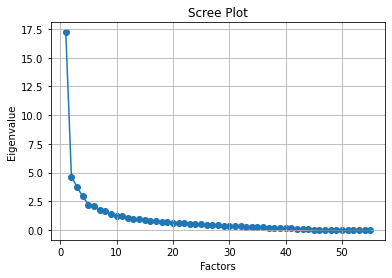

In [108]:
# Create scree plot using matplotlib
plt.scatter(range(1,ecodf.shape[1]+1),ev)
plt.plot(range(1,ecodf.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [109]:
fa.fit(perdf)
ev1, vectors = fa.get_eigenvalues()

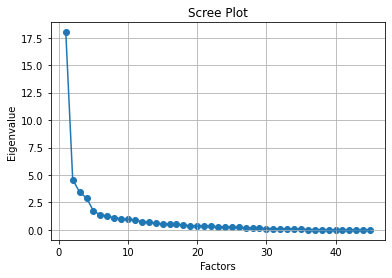

In [110]:
# Create scree plot using matplotlib
plt.scatter(range(1,perdf.shape[1]+1),ev1)
plt.plot(range(1,perdf.shape[1]+1),ev1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#Perform factor analysis on economic freedom dataset 
fa = FactorAnalyzer(n_factors=10,rotation='varimax')
fa.fit(efdf)

In [111]:
#Perform factor analysis on economic freedom dataset 
fa = FactorAnalyzer(n_factors=5,rotation='varimax') 
fa.fit(ecodf)
factor_efdf=pd.DataFrame(fa.loadings_,index=ecodf.columns)
factor_efdf

0         1         2         3  \
ef_government_consumption          -0.485189 -0.160668 -0.081807  0.175635   
ef_government_transfers            -0.509863 -0.366921 -0.023010  0.493218   
ef_government_enterprises           0.292595  0.148784  0.115320 -0.151582   
ef_government_tax_income           -0.226057  0.323711 -0.221966  0.649568   
ef_government_tax_payroll          -0.125736  0.172675 -0.152165  0.717142   
ef_government_tax                  -0.198947  0.263347 -0.207377  0.774094   
ef_government_soa                   0.114698  0.227881  0.472544 -0.310387   
ef_government                      -0.188340  0.039347  0.134664  0.277081   
ef_legal_judicial                   0.799770  0.168330  0.244601 -0.127861   
ef_legal_courts                     0.910054  0.145773  0.215300  0.007878   
ef_legal_protection                 0.835164  0.162097  0.208906 -0.062363   
ef_legal_military                   0.639415  0.209216  0.235873 -0.132135   
ef_legal_integrity                  0.792607  0.145518  0.234942 -0.174598   
ef_legal_enforcement                0.619038  0.178308  0.056497  0.029327   
ef_legal_regulatory                 0.338345  0.333392 -0.120750  0.136341   
ef_legal_police                     0.790640  0.045895  0.168824  0.053089   
ef_legal_gender                     0.196531  0.232707  0.278422 -0.277428   
ef_legal                            0.870274  0.271313  0.230299 -0.143658   
ef_money_growth                     0.184156  0.111366  0.367074  0.083854   
ef_money_sd                         0.190813  0.046881  0.496250 -0.197726   
ef_money_inflation                  0.255030  0.113748  0.565975 -0.008821   
ef_money_currency                   0.318629  0.727993 -0.035208  0.106082   
ef_money                            0.395848  0.595417  0.375527  0.030131   
ef_trade_tariffs_revenue            0.216666  0.536617  0.104723 -0.035103   
ef_trade_tariffs_mean               0.238375  0.673182  0.372162  0.058938   
ef_trade_tariffs_sd                -0.296675  0.372966  0.345054  0.064251   
ef_trade_tariffs                   -0.012768  0.740759  0.367669  0.050143   
ef_trade_regulatory_nontariff       0.561532  0.280722  0.215433  0.124848   
ef_trade_regulatory_compliance      0.536408  0.314365  0.297820 -0.091795   
ef_trade_regulatory                 0.611254  0.332008  0.327271 -0.028645   
ef_trade_black                      0.145508  0.073395  0.487473  0.063969   
ef_trade_movement_foreign           0.418478  0.688337  0.141477  0.032492   
ef_trade_movement_capital           0.215401  0.616142  0.095362  0.148481   
ef_trade_movement_visit             0.274074  0.343432  0.172219 -0.089080   
ef_trade_movement                   0.372328  0.700879  0.161455  0.035247   
ef_trade                            0.444732  0.665546  0.455447  0.033890   
ef_regulation_credit_ownership      0.138071  0.267453  0.422524  0.061644   
ef_regulation_credit_private        0.111349  0.000284  0.307271  0.008394   
ef_regulation_credit_interest       0.264064  0.227055  0.311189  0.054075   
ef_regulation_credit                0.230206  0.250750  0.628449  0.059031   
ef_regulation_labor_minwage         0.393376 -0.078529 -0.000741  0.444856   
ef_regulation_labor_firing          0.131385 -0.056238  0.235919  0.550664   
ef_regulation_labor_bargain        -0.040944  0.076785  0.172805  0.506153   
ef_regulation_labor_hours           0.092816 -0.159281  0.147410  0.289548   
ef_regulation_labor_dismissal       0.272632  0.103061  0.265487 -0.046230   
ef_regulation_labor_conscription    0.209691  0.068308  0.175658  0.077770   
ef_regulation_labor                 0.412124 -0.016860  0.314444  0.433974   
ef_regulation_business_adm          0.360433 -0.052729  0.176176  0.490927   
ef_regulation_business_bureaucracy  0.609883  0.279113  0.296111  0.075840   
ef_regulation_business_start        0.507986  0.219191  0.092294  0.105148   
ef_regulation_business_bribes       0.692884  0.213279  0.305074 

In [112]:
fa_scores = fa.transform(ecodf)

In [113]:
fa_scores

array([[-0.95325656,  1.04303129,  1.13457439,  0.34343625,  0.64437144],
       [-0.74019669,  0.93668405,  1.11355962,  0.71593196,  0.11149441],
       [ 0.02947327,  0.90554241,  0.29515753,  0.26247029,  0.36204573],
       ...,
       [-0.87707621, -1.26456829, -2.769605  , -1.55359815,  0.60752267],
       [-0.5118499 , -2.18362654, -3.85434213, -1.30790594,  0.80766414],
       [-0.89727973, -2.27881174, -3.3259093 , -1.75454496,  0.31062044]])

In [115]:
efnew = pd.DataFrame(fa_scores)

In [117]:
efnew.columns = ['legal_factor', 'money_factor','trade_fact', 'regulation','governance']

In [191]:
efnew['ef_score'] = efdf['ef_score']
efnew['countries']= efdf['countries']

In [192]:
#Training dataset for economic freedom is ready efnew.
efnew.head()

legal_factor  money_factor  trade_fact  regulation  governance  ef_score  \
0     -0.953257      1.043031    1.134574    0.343436    0.644371      7.81   
1     -0.740197      0.936684    1.113560    0.715932    0.111494      4.90   
2      0.029473      0.905542    0.295158    0.262470    0.362046      5.50   
3     -0.253613      1.153740    0.762861    0.324967    0.468741      5.50   
4     -0.461117      1.421523    1.055612    0.475053    0.636468      8.03   

   countries  
0    Albania  
1    Algeria  
2     Angola  
3  Argentina  
4    Armenia

In [193]:
efnew.count()

legal_factor    1782
money_factor    1782
trade_fact      1782
regulation      1782
governance      1782
ef_score        1782
countries       1782
dtype: int64

In [123]:
#Perform factor analysis on personal freedom dataset 
fa1 = FactorAnalyzer(n_factors=5,rotation='varimax') 
fa1.fit(perdf)
factor_pfdf=pd.DataFrame(fa1.loadings_,index=perdf.columns)
factor_pfdf


0         1         2         3  \
pf_rol_procedural                0.301003  0.280602  0.011762  0.795050   
pf_rol_civil                     0.194757  0.186412 -0.022357  0.778190   
pf_rol_criminal                  0.135635  0.178460 -0.001475  0.878887   
pf_rol                           0.307231  0.205016  0.332055  0.715627   
pf_ss_homicide                  -0.160872 -0.070663  0.127669  0.528414   
pf_ss_disappearances_disap       0.276576  0.155523  0.470960  0.209952   
pf_ss_disappearances_violent     0.120241  0.165633  0.793354 -0.001821   
pf_ss_disappearances_organized   0.287668  0.169764  0.571412  0.406825   
pf_ss_disappearances_fatalities  0.071354  0.176557  0.853779 -0.023155   
pf_ss_disappearances_injuries    0.090706  0.151854  0.846536 -0.066418   
pf_ss_disappearances             0.239123  0.196962  0.911859  0.189165   
pf_ss_women_fgm                  0.012886  0.402306  0.067482  0.213298   
pf_ss_women_inheritance          0.292731  0.670258  0.161863  0.248273   
pf_ss_women                      0.217055  0.702402  0.149365  0.288516   
pf_ss                            0.106534  0.409107  0.512507  0.591446   
pf_movement_domestic             0.455601  0.265514  0.179708  0.146100   
pf_movement_foreign              0.532380  0.260667  0.202113  0.075685   
pf_movement_women                0.293637  0.479809  0.200109  0.148729   
pf_movement                      0.571201  0.441839  0.260403  0.162833   
pf_religion_freedom              0.697469  0.248994  0.227362  0.100014   
pf_religion_repression           0.824906  0.176338  0.169640  0.119124   
pf_religion_harassment           0.107259  0.056959  0.217982 -0.066688   
pf_religion_restrictions         0.268340  0.091200  0.046585 -0.049503   
pf_religion                      0.683247  0.213758  0.237419  0.040651   
pf_association_entry             0.871855  0.108806  0.100579  0.112295   
pf_association_assembly          0.782494  0.261703  0.036766  0.144039   
pf_association_barries           0.885025  0.135574 -0.020921  0.103576   
pf_association_bans              0.783349  0.140596  0.030697 -0.037573   
pf_association_estopparties      0.883412  0.142054  0.000767  0.036079   
pf_association_opposition        0.761460  0.121621  0.139767  0.217879   
pf_association_civilrepression   0.822151  0.133488  0.160695  0.252660   
pf_association                   0.939312  0.173845  0.084648  0.166306   
pf_expression_killed             0.053675  0.007318  0.556578  0.048649   
pf_expression_jailed             0.326954 -0.007201  0.138054  0.003123   
pf_expression_media              0.742394  0.197772  0.204730  0.376309   
pf_expression_cable              0.594921  0.204377  0.014777  0.066168   
pf_expression_newspapers         0.693110  0.273065  0.045528  0.095709   
pf_expression_control            0.716038  0.242860  0.091493  0.015144   
pf_expression                    0.814103  0.222607  0.275482  0.170444   
pf_identity_legal                0.104406  0.051896 -0.008435  0.306440   
pf_identity_sex_male             0.205448  0.819204  0.059401  0.074094   
pf_identity_sex_female           0.228520  0.782163  0.135307  0.002134   
pf_identity_sex                  0.228198  0.892053  0.097718  0.032734   
pf_identity_divorce              0.310342  0.591573  0.190279  0.132328   
pf_identity                      0.308058  0.866045  0.154887  0.110964   

                                        4  
pf_rol_procedural                0.111370  
pf_rol_civil                     0.092856  
pf_rol_criminal                  0.071842  
pf_rol                          -0.008541  
pf_ss_homicide                  -0.323974  
pf_ss_disappearances_disap       0.167975  
pf_ss_disappearances_violent     0.075561  
pf_ss_disappearances_organized   0.093135  
pf_ss_disappearances_fatalities  0.052028  
pf_ss_disappearances_injuries    0.088291  
pf_ss_disappearances             0.147537  
pf_ss_women_fgm                 -0.034236  
pf_ss_women_inher

In [124]:
fa1_scores = fa1.transform(perdf)

In [125]:
fa1_scores

array([[ 0.55188567,  0.17601103,  0.78688882,  0.02787927, -0.18052887],
       [ 0.44396645,  0.0843612 ,  0.8148393 ,  0.23330179, -0.17566323],
       [ 0.68494655, -0.46369714,  0.82107065,  0.07245718, -0.03717061],
       ...,
       [-0.3550176 ,  0.17532649,  0.05233386, -5.06718012,  3.88909759],
       [-0.95505222,  0.48400896, -1.00780479, -0.79679401,  0.28772129],
       [-0.39261497,  0.23577483, -0.16017774, -5.03145989,  3.88021414]])

In [126]:
pfnew = pd.DataFrame(fa1_scores)

In [127]:
pfnew.columns = ['expression', 'gender_bias','dissap', 'ruleoflaw','religion']

In [194]:
pfnew['pf_score'] = pfdf['pf_score']
pfnew['countries'] = pfdf['countries']

In [195]:
#Training dataset for personal freedom is ready pfnew.
pfnew.head()

expression  gender_bias    dissap  ruleoflaw  religion  pf_score  countries
0    0.551886     0.176011  0.786889   0.027879 -0.180529      8.38    Albania
1    0.443966     0.084361  0.814839   0.233302 -0.175663      5.51    Algeria
2    0.684947    -0.463697  0.821071   0.072457 -0.037171      6.50     Angola
3    0.759020    -0.550894  0.705585   0.265583 -0.246107      8.73  Argentina
4    0.761895     0.643793 -0.575671   0.211884  0.047089      8.32    Armenia

In [132]:
pfnew.count()

expression     1782
gender_bias    1782
dissap         1782
ruleoflaw      1782
religion       1782
pf_score       1782
dtype: int64

In [176]:
#Prepare two linear regression models
#model1 for economic freedom
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [197]:
#Linear regression model for economic freedom
#Drop the target variable and define X
X = efnew.drop(['ef_score'], axis=1)
Y = efnew['ef_score']

In [198]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [205]:
X_train1 = X_train.drop(['countries'],axis = 1)
X_test1 = X_test.drop(['countries'],axis = 1)

In [206]:
efmodel = LinearRegression()
efmodel.fit(X_train1,Y_train)

LinearRegression()

In [209]:
#Linear regression model for personal freedom
X1 = pfnew.drop(['pf_score'], axis=1)
Y1 = pfnew['pf_score']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=1)
X1_train1 = X1_train.drop(['countries'],axis = 1)
X1_test1 = X1_test.drop(['countries'],axis = 1)
pfmodel = LinearRegression()
pfmodel.fit(X1_train1,Y1_train)

LinearRegression()

In [207]:
#Now we do the predictions of Economic Freedom score
Y_pred = efmodel.predict(X_test1)

In [208]:
Y_pred

array([6.84535505, 6.97342135, 6.85050923, 6.78868479, 6.88817343,
       6.84123812, 6.9693954 , 6.82002361, 6.66096029, 6.84746829,
       6.72568849, 6.78010633, 6.93956692, 6.75486433, 6.76922843,
       6.84509104, 6.70260839, 6.77367451, 6.78906324, 6.9779    ,
       6.7993941 , 6.80525664, 6.8524341 , 6.86902412, 6.7782625 ,
       6.85774107, 6.65915118, 6.86030053, 6.83541473, 6.7645395 ,
       6.87789394, 6.8274239 , 6.80885903, 6.80807327, 6.92027063,
       6.81618762, 6.87554737, 6.79365976, 6.89683491, 6.76899415,
       6.84689653, 6.87638111, 6.96111868, 6.76698444, 6.92724865,
       6.70446547, 6.80024516, 6.84838783, 6.88185405, 6.77547243,
       6.84655943, 6.93130586, 6.79634243, 6.85010521, 6.80478225,
       6.89554265, 6.79007498, 6.80982572, 6.82750131, 6.95407536,
       6.90348839, 6.90838103, 6.73665475, 6.8213445 , 6.77745076,
       6.75808868, 6.80983686, 6.83479472, 6.83909377, 6.96330823,
       6.84993687, 6.79583493, 6.95447252, 6.88821315, 6.88000

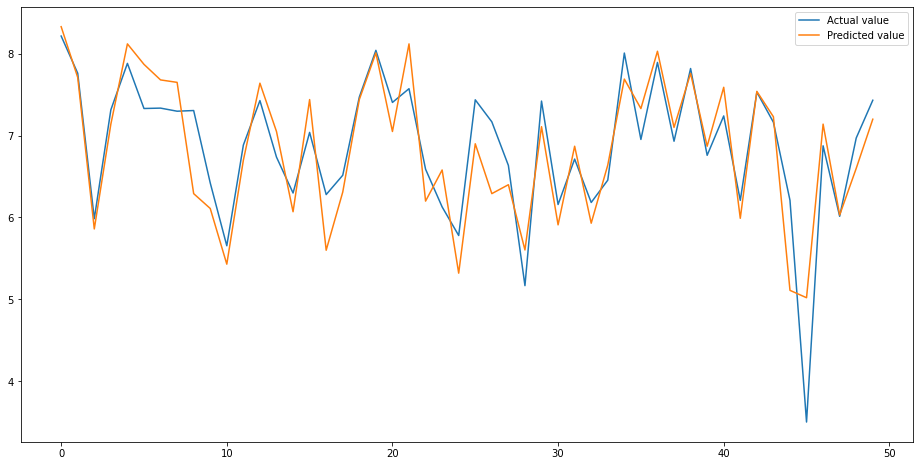

In [186]:
#Plotting the predicted vs actual scores for Economic Freedom
test = pd.DataFrame({'Predicted value':Y_pred, 'Actual value':Y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [210]:
#Now we will do prediction for personal freedom score
Y1_pred = pfmodel.predict(X1_test1)

In [211]:
Y1_pred

array([7.19457762, 7.27502117, 7.31864368, 7.32809668, 7.327332  ,
       7.28264252, 7.30034108, 7.32942053, 7.29261183, 7.27724116,
       7.2694866 , 7.29222022, 7.34129873, 7.3465584 , 7.23756585,
       7.3298854 , 7.29986087, 7.21286789, 7.26437204, 7.34642872,
       7.32097011, 7.33012312, 7.27428508, 7.29494766, 7.24667323,
       7.300725  , 7.29261183, 7.31007126, 7.30804515, 7.2796861 ,
       7.22690958, 7.28190792, 7.26235203, 7.26661922, 7.25909595,
       7.21572982, 7.23930023, 7.26037001, 7.31483167, 7.25455388,
       7.31395729, 7.28019845, 7.34510165, 7.35341405, 7.21432433,
       7.24070416, 7.24070861, 7.21490819, 7.31001865, 7.26854816,
       7.27915515, 7.32588119, 7.29411256, 7.2358961 , 7.21525977,
       7.24666585, 7.20698523, 7.30606197, 7.28671584, 7.30361895,
       7.26270644, 7.29685993, 7.33497672, 7.23668229, 7.31704093,
       7.2600481 , 7.21971457, 7.26269874, 7.26395473, 7.28150764,
       7.26751005, 7.35549743, 7.22466599, 7.30218175, 7.29608

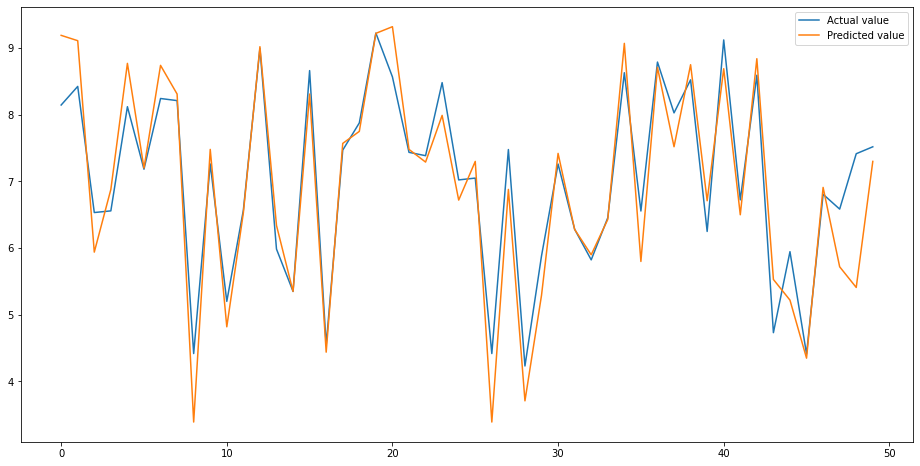

In [189]:
#Plotting the predicted vs actual scores for Personal Freedom
test1 = pd.DataFrame({'Predicted value':Y1_pred, 'Actual value':Y1_test})
fig= plt.figure(figsize=(16,8))
test1 = test1.reset_index()
test1 = test1.drop(['index'],axis=1)
plt.plot(test1[:50])
plt.legend(['Actual value','Predicted value'])

In [212]:
#Human freedom score for the first country 
hf_score = (Y_pred[0] + Y1_pred[0])/2

In [220]:
print("Human freedom score for "+ X_test['countries'].iat[0]+' is', hf_score)

Human freedom score for Guinea-Bissau is 7.019966335560655
